In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.show()

In [4]:
# データ読み込み
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

# 欠損値が多いNameとCabinを削除
df_train = df_train.drop(["Name", "Cabin"], axis=1)

# 扱いがわからないTicketを削除
df_train = df_train.drop(["Ticket"], axis=1)


In [5]:
# カテゴリカル変数のEmbarkedを数値に置き換える
df_train = df_train.replace({"Embarked": {"S" : 0, "C" : 1, "Q" : 2}})
df_train = df_train.fillna({"Embarked": 3})

In [6]:
df_train = df_train.replace({"Sex": {"male": 1, "female": 0}})

In [7]:
# Ageの欠損値を最頻値で埋める
df_train = df_train.fillna({"Age": int(df_train["Age"].mode())})

In [8]:
# Ageを区間ごとにビニング
age_bin_list = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_bin = pd.cut(df_train["Age"], bins = age_bin_list)
df_train["age_bin"] = age_bin
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bin
0,1,0,3,1,22.0,1,0,7.2500,0.0,"(20, 30]"
1,2,1,1,0,38.0,1,0,71.2833,1.0,"(30, 40]"
2,3,1,3,0,26.0,0,0,7.9250,0.0,"(20, 30]"
3,4,1,1,0,35.0,1,0,53.1000,0.0,"(30, 40]"
4,5,0,3,1,35.0,0,0,8.0500,0.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0,"(20, 30]"
887,888,1,1,0,19.0,0,0,30.0000,0.0,"(10, 20]"
888,889,0,3,0,24.0,1,2,23.4500,0.0,"(20, 30]"
889,890,1,1,1,26.0,0,0,30.0000,1.0,"(20, 30]"


In [9]:
# ビニングしたものをから以下のカラムを作る
# 0-10歳は生き残る確率が高い -> is_age_0_10
# 20-30歳は死ぬ確率が高い -> is_age_20_30
# TODO ここを実装

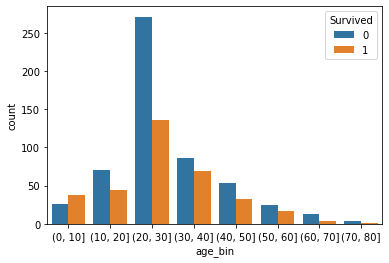

In [10]:
sns.countplot(x="age_bin", hue="Survived", data=df_train)

In [11]:
# factorizeは適当にユニークな数字に置き換えてくれる
df_train["age_bin_id"] = df_train["age_bin"].factorize()[0]

In [12]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bin,age_bin_id
0,1,0,3,1,22.0,1,0,7.2500,0.0,"(20, 30]",0
1,2,1,1,0,38.0,1,0,71.2833,1.0,"(30, 40]",1
2,3,1,3,0,26.0,0,0,7.9250,0.0,"(20, 30]",0
3,4,1,1,0,35.0,1,0,53.1000,0.0,"(30, 40]",1
4,5,0,3,1,35.0,0,0,8.0500,0.0,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0,"(20, 30]",0
887,888,1,1,0,19.0,0,0,30.0000,0.0,"(10, 20]",4
888,889,0,3,0,24.0,1,2,23.4500,0.0,"(20, 30]",0
889,890,1,1,1,26.0,0,0,30.0000,1.0,"(20, 30]",0


In [15]:
def show_feature_describe(train):
    stats = []
    for col in train.columns:
        stats.append((col,
                    train[col].nunique(),
                    train[col].value_counts().index[0],
                    train[col].value_counts().values[0],
                    train[col].isnull().sum() * 100 / train.shape[0],
                    train[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                    train[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique values', 'Most frequent item', 'Freuquence of most frequent item', 'Percentage of missing values', 'Percentage of values in the biggest category', 'Type'])
    stats_df.sort_values('Percentage of missing values', ascending=False)
    #print(stats_df)
    return stats_df

In [16]:
show_feature_describe(df_train)

,Feature,Unique values,Most frequent item,Freuquence of most frequent item,Percentage of missing values,Percentage of values in the biggest category,Type
0,PassengerId,891,891,1,0.0,0.112233,int64
1,Survived,2,0,549,0.0,61.616162,int64
2,Pclass,3,3,491,0.0,55.106622,int64
3,Sex,2,1,577,0.0,64.758698,int64
4,Age,88,24,207,0.0,23.232323,float64
5,SibSp,7,0,608,0.0,68.237935,int64
6,Parch,7,0,678,0.0,76.094276,int64
7,Fare,248,8.05,43,0.0,4.826038,float64
8,Embarked,4,0,644,0.0,72.278339,float64
9,age_bin,8,"(20, 30]",407,0.0,45.679012,category
